# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

---
---

### 41.1 Loading and viewing the data

There are four files in the `/data` directory related to Baptist Health:
* bhmclr_cpt.xlsx
* bhmclr_drg.xlsx
* bhmclr_med.xlsx
* bhmclr_proc.xlsx

All of these files have the same format, so you can load and process them all the same way, but the subsets of data in each are distinct.

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('/data/bhmclr_drg.xlsx', sheet_name='Sheet1', skiprows=3)

In [94]:
data.shape

(3864, 19)

In [95]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [96]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b53c42d68>,
      dtype=object)

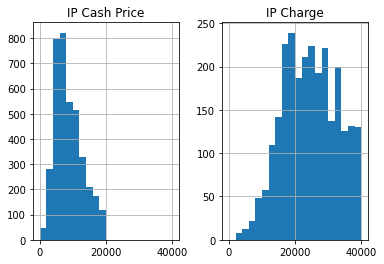

In [97]:
data[['IP Cash Price','IP Charge']].hist(bins=20, range=[0,40000])

### Question:

**What do you observe from the histograms above?**

---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

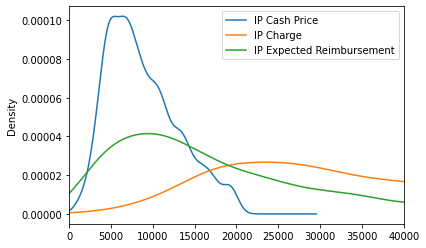

In [98]:
graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [99]:
data['Payer'].value_counts()

ARKANSAS TOTAL CARE [40700]          650
ALLWELL [15100]                      650
AETNA [65000]                        641
MULTIPLAN                            641
HEALTHSCOPE [95700]                  641
AR BLUE CROSS BLUE SHIELD [25001]    641
Name: Payer, dtype: int64

In [104]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        AxesSubplot(0.125,0.125;0.775x0.755)
ALLWELL [15100]                      AxesSubplot(0.125,0.125;0.775x0.755)
AR BLUE CROSS BLUE SHIELD [25001]    AxesSubplot(0.125,0.125;0.775x0.755)
ARKANSAS TOTAL CARE [40700]          AxesSubplot(0.125,0.125;0.775x0.755)
HEALTHSCOPE [95700]                  AxesSubplot(0.125,0.125;0.775x0.755)
MULTIPLAN                            AxesSubplot(0.125,0.125;0.775x0.755)
Name: IP Expected Reimbursement, dtype: object

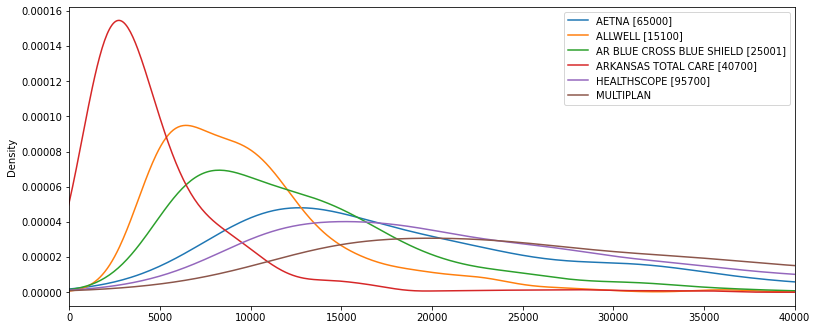

In [105]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(xlim=(0,40000),
    legend=True,
    figsize=(13,5.5))


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

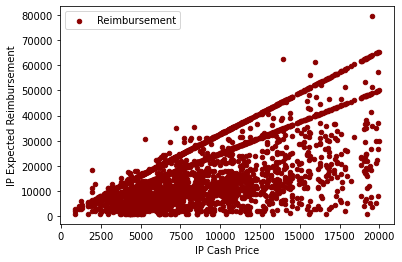

In [11]:
data.plot.scatter(x='IP Cash Price', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

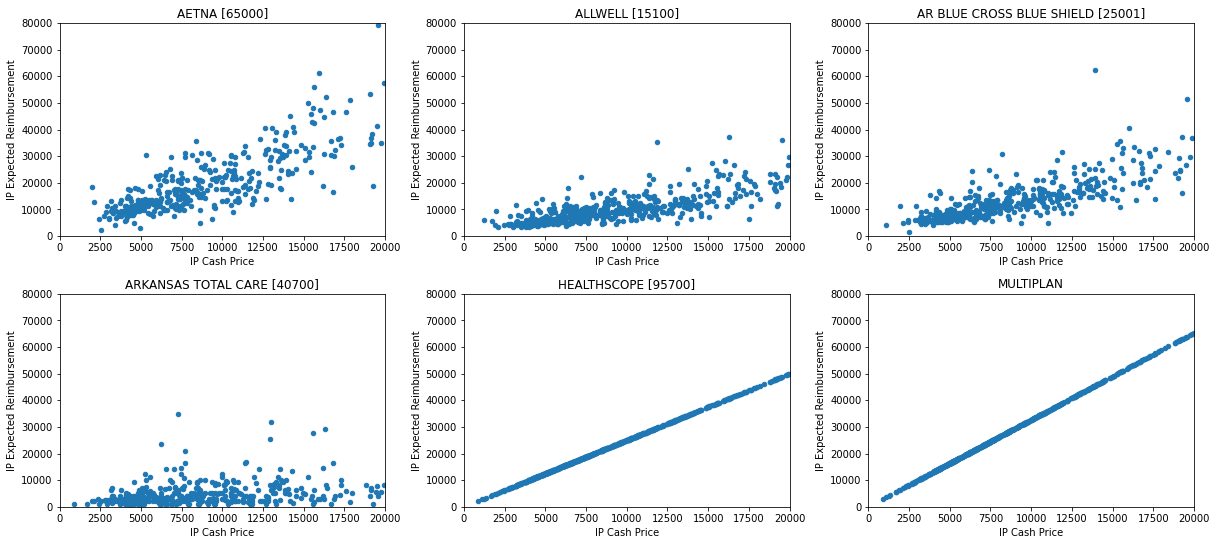

In [12]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [19]:
import pandas as pd
import seaborn as sns 

data_1 = pd.read_excel('HMP 5200_MO Data.xlsx', sheet_name='Missouri Data')

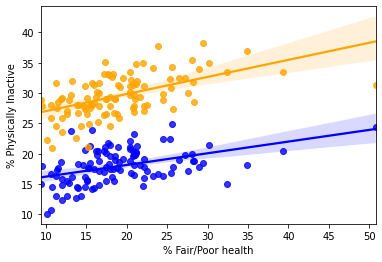

In [20]:
sns.regplot(data = data_1, x='% Fair/Poor health', y='% Uninsured', color='Blue')
sns.regplot(data = data_1, x='% Fair/Poor health', y='% Physically Inactive', color='Orange')

### Observations #1

From this data set we can observe and confirm a hypothesis that those who are in worse health condition tend to be more physically inactive. The seaborn capability shows us via a line of how the data is trending and can help us estimate future values if nesssary. 

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('owid-covid-data.csv')

In [148]:
data['continent'].value_counts()

Africa           17113
Asia             15704
Europe           15666
North America     7514
South America     3980
Oceania           1729
Name: continent, dtype: int64

In [140]:
data.groupby(['continent'])['total_deaths'].count()

continent
Africa           13384
Asia             10107
Europe           12946
North America     5049
Oceania            998
South America     2832
Name: total_deaths, dtype: int64

continent
Africa           AxesSubplot(0.125,0.125;0.775x0.755)
Asia             AxesSubplot(0.125,0.125;0.775x0.755)
Europe           AxesSubplot(0.125,0.125;0.775x0.755)
North America    AxesSubplot(0.125,0.125;0.775x0.755)
Oceania          AxesSubplot(0.125,0.125;0.775x0.755)
South America    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_deaths, dtype: object

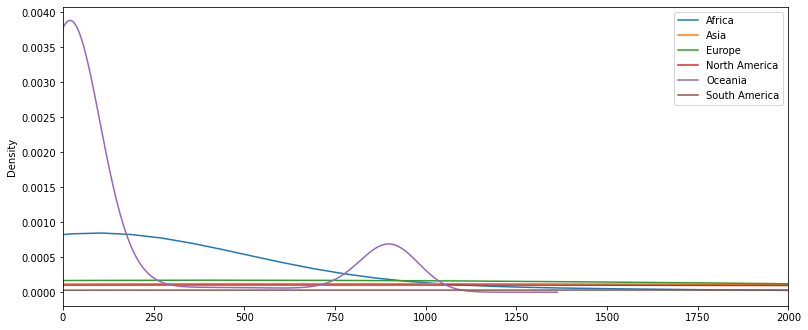

In [146]:
data.groupby(['continent'])['total_deaths'].plot.kde(xlim=(0,2000), legend=True,
    figsize=(13,5.5))

### Observations #2

From this generated graph we can tell there are a higher density of deaths in lower numbers in the Oceania continent, but there is a spike in occurance when death toll is between 750 and 100. Africa shows initally a density for death toll but tapers off as well. Remaining continents have a contsant increase in deaths. 

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

---

In [150]:
%%bash
git pull
git add week09_assignment_2.ipynb
git commit -a -m "Submitting the week 9 programming assignment"
git push

Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
	../midterm/Untitled.ipynb
	../midterm/Untitled1.ipynb
	../midterm/Untitled2.ipynb
	../week02/
	../week03/Untitled.ipynb
	../week03/Untitled1.ipynb
	../week04/Untitled.ipynb
	../week04/Untitled1.ipynb
	../week04/Untitled2.ipynb
	../week04/Untitled3.ipynb
	../week05/Untitled.ipynb
	../week06/week06_assignment_2-Copy1.ipynb
	../week08/Untitled.ipynb
	HMP 5200_MO Data.xlsx
	HospitalCosts.xlsx
	Untitled.ipynb
	Untitled1.ipynb
	owid-covid-data.csv
	owid.covid.xlsx

nothing added to commit but untracked files present


Everything up-to-date



---

If the message above says something like _Submitting the week 8 programming assignment_ or _Everything is up to date_, then your work was submitted correctly.